<font size="+3"><strong>Decision Tree for Imbalanced Data</strong></font>

In [1]:
# Import module for reading and writing compressed files in gzip format
import gzip  

# Import module for working with JSON (JavaScript Object Notation) data
import json  

# Import module for serializing and saving Python objects
import pickle  

# Import library for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt  

# Import pandas for data manipulation and analysis
import pandas as pd  

# Import seaborn for enhanced statistical data visualization
import seaborn as sns  

# Import RandomOverSampler to balance imbalanced datasets by oversampling minority class
from imblearn.over_sampling import RandomOverSampler  

# Import RandomUnderSampler to balance datasets by undersampling majority class
from imblearn.under_sampling import RandomUnderSampler  

# Import SimpleImputer to handle missing values in datasets
from sklearn.impute import SimpleImputer  

# Import ConfusionMatrixDisplay to visualize confusion matrices
from sklearn.metrics import ConfusionMatrixDisplay  

# Import train_test_split to split data into training and testing sets
from sklearn.model_selection import train_test_split  

# Import make_pipeline to streamline model creation and preprocessing steps
from sklearn.pipeline import make_pipeline  

# Import DecisionTreeClassifier for building decision tree classification models
from sklearn.tree import DecisionTreeClassifier  


# Prepare Data

## Import

### 🧩 Function: `wrangle(filename)`

The `wrangle()` function is designed to **load and preprocess** a dataset that is stored in a **gzip-compressed JSON file**.  
It performs the following steps:

1. **Open the file** using `gzip.open()` in read mode (`"r"`).  
   This allows the function to handle compressed `.gz` files directly.

2. **Load the JSON content** using `json.load()`, which converts the JSON structure into a Python dictionary.

3. **Extract the data portion** from the dictionary (`data["data"]`) and convert it into a **pandas DataFrame** for easier analysis and manipulation.

4. **Set the index** of the DataFrame to `"company_id"` — ensuring each row is uniquely identified by the company’s ID.

5. **Return the cleaned DataFrame**, ready for further exploration or modeling.

📘 *In short:*  
This function efficiently reads compressed JSON data, structures it into a tabular format, and returns a clean, indexed DataFrame for analysis.


In [4]:
def wrangle(filename):
    with gzip.open(filename,"r") as f:
        data=json.load(f)
    df=pd.DataFrame(data["data"]).set_index("company_id")
    return df

In [5]:
df = wrangle("../data/poland-bankruptcy-data-2009.json.gz")
print(df.shape)
df.head()

(9977, 65)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,bankrupt
company_id,,,,,,,,,,,,,,,,,,,,,
1,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.12250,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,False
2,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.17210,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,False
3,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.98810,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,False
5,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.40940,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,False
6,0.182060,0.55615,0.32191,1.6045,16.3140,0.00000,0.182060,0.79808,1.8126,0.44385,...,0.555770,0.410190,0.46957,0.029421,8.4553,3.3488,107.240,3.4036,12.4540,False


## Explore

### 🔍 Exploring the Dataset

Before diving deeper into modeling, let's take a moment to **understand the structure of our dataset**.  
In the previous lesson, we learned that the data was stored in a **JSON file** — a format similar to a Python dictionary, organized in key–value pairs.  
Now, we'll explore what’s actually inside those values.

---

#### 🧭 Step 1: Inspecting the DataFrame

We'll begin by using the **`info()`** method to get a concise summary of the dataset.  
This will tell us:

- The **total number of entries (rows)**  
- The **names and data types of columns**  
- Which **columns contain missing values**

From this inspection, we can identify:
- All features are **numerical**.  
- Some columns contain **missing values** that will need imputation.  
- The **target column** is `"bankrupt"`, which indicates whether a company has gone bankrupt or not.

---

#### 📊 Step 2: Visualizing the Target Distribution

Next, let’s check how many companies in the dataset are **bankrupt vs. not bankrupt**.  
This will help us see if the dataset is **balanced** or **imbalanced**, which is crucial for model training.

We'll create a **bar chart** showing the **relative frequencies** (not raw counts) of each class in the `"bankrupt"` column using the argument `normalize=True`.


In [10]:
df.shape

(9977, 65)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9977 entries, 1 to 10503
Data columns (total 65 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feat_1    9977 non-null   float64
 1   feat_2    9977 non-null   float64
 2   feat_3    9977 non-null   float64
 3   feat_4    9960 non-null   float64
 4   feat_5    9952 non-null   float64
 5   feat_6    9977 non-null   float64
 6   feat_7    9977 non-null   float64
 7   feat_8    9964 non-null   float64
 8   feat_9    9974 non-null   float64
 9   feat_10   9977 non-null   float64
 10  feat_11   9977 non-null   float64
 11  feat_12   9960 non-null   float64
 12  feat_13   9935 non-null   float64
 13  feat_14   9977 non-null   float64
 14  feat_15   9970 non-null   float64
 15  feat_16   9964 non-null   float64
 16  feat_17   9964 non-null   float64
 17  feat_18   9977 non-null   float64
 18  feat_19   9935 non-null   float64
 19  feat_20   9935 non-null   float64
 20  feat_21   9205 non-null   float64


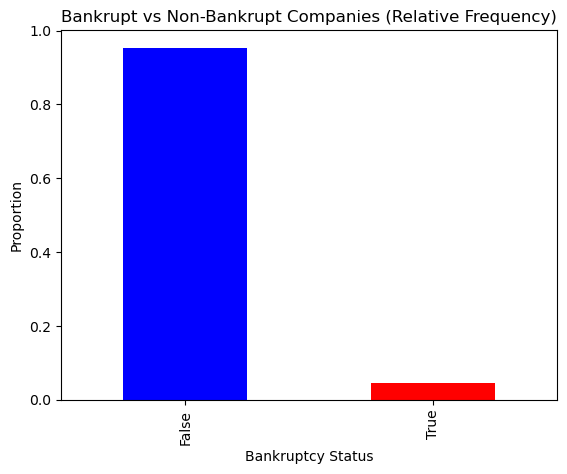

In [9]:
df["bankrupt"].value_counts(normalize=True).plot(
    kind="bar", 
    color=["blue", "red"], 
    title="Bankrupt vs Non-Bankrupt Companies (Relative Frequency)"
)
plt.xlabel("Bankruptcy Status")
plt.ylabel("Proportion")
plt.show()

### 🧮 Checking for Multicollinearity

An important step before model building is to check whether any of our **features are highly correlated** with each other — a problem known as **multicollinearity**.  
When features are strongly correlated, it can make it difficult for some models (especially linear ones) to understand which variable is truly influencing the prediction.

---

#### 🧭 Step 1: Preparing the Data

Since the column **"bankrupt"** is our **target variable**, it will be excluded from the correlation analysis.  
We'll focus only on the **numerical predictor variables** to see how they relate to one another.

---

#### 📊 Step 2: Correlation Heatmap

We'll visualize the relationships between features using a **correlation heatmap**.  
Each cell in the heatmap represents the strength and direction of the linear relationship between two features:
- Values close to **+1** indicate a **strong positive correlation**.  
- Values close to **–1** indicate a **strong negative correlation**.  
- Values near **0** suggest **little or no correlation**.

By examining this heatmap, we can quickly identify any groups of features that are highly correlated and may need to be removed or combined before training.

---

This step ensures that our model remains stable, interpretable, and free from redundancy in the input features.


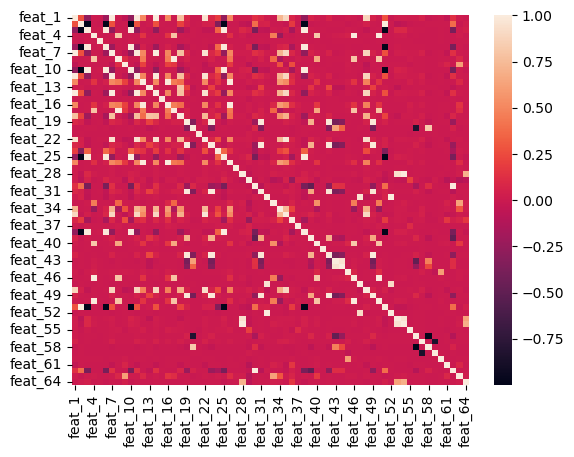

In [13]:
corr=df.drop(columns="bankrupt").corr()
sns.heatmap(corr);

## Split

### ⚙️ Creating Features and Target

Now that we've explored the dataset and understood its structure, the next step is to **separate our features and target variable**.  
Here’s what we’ll do:

- The **target variable** is `"bankrupt"`, which indicates whether a company has gone bankrupt (1) or not (0).  
- All other columns in the dataset will be used as **features (`X`)** to predict this outcome.

This separation allows us to train our machine learning model using the features while testing how well it can predict the target.

---

### 🧩 Splitting the Data

Once we’ve created `X` and `y`, we’ll split the dataset into **training** and **testing** subsets.

- **Training set (80%)** → Used to train the model.  
- **Test set (20%)** → Used to evaluate how well the model generalizes to unseen data.  

We’ll use **`train_test_split()`** from scikit-learn for this purpose and specify a **`random_state`** to ensure the results are **reproducible** — meaning we’ll get the same split every time the code runs.


In [14]:
target = "bankrupt"
X = df.drop(columns=target)
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (9977, 64)
y shape: (9977,)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7981, 64)
y_train shape: (7981,)
X_test shape: (1996, 64)
y_test shape: (1996,)


## Resample

### 🔄 Handling Class Imbalance with Under-Sampling

After splitting the data, it's important to check whether the **target classes** (bankrupt vs. non-bankrupt) are **balanced**.  
In many real-world datasets — especially in bankruptcy prediction — the number of bankrupt companies is **much smaller** than the number of non-bankrupt ones.  
This imbalance can cause models to become **biased** toward predicting the majority class.

---

### ⚖️ What is Under-Sampling?

**Under-sampling** is a resampling technique used to address class imbalance by **reducing the size of the majority class**.  
Instead of duplicating minority class samples, it randomly removes samples from the majority class until both classes have roughly the same number of records.

This helps the model:
- Learn from a **balanced representation** of classes.  
- Avoid **overfitting** to the majority class.  
- Improve performance metrics such as **recall** and **F1-score** for the minority class.

---

### 🧭 Implementation Overview

We’ll create:
- `X_train_under` → the new **feature matrix** after under-sampling.  
- `y_train_under` → the corresponding **target vector** after under-sampling.

These balanced datasets will then be used to train the model, ensuring fairer and more reliable learning.


In [16]:
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train,y_train)
print(X_train_under.shape)
X_train_under.head()

(768, 64)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64
company_id,,,,,,,,,,,,,,,,,,,,,
1509,0.121400,0.097238,0.74500,8.66160,25.8370,0.000000,0.158840,9.284100,2.7588,0.902760,...,775.71,0.075999,0.13447,0.94243,0.000000,4.9049,11.3390,12.865,28.3720,17.4870
6096,0.316280,0.264920,0.65346,3.46660,55.1890,0.290140,0.316280,2.774700,2.4721,0.735080,...,1367.90,0.119990,0.43027,0.87412,0.000000,10.6020,4.5533,39.115,9.3314,30.2870
7369,0.066615,0.890270,-0.48007,0.46076,-76.3080,0.047487,0.087936,-0.011406,1.0952,-0.010155,...,-46566.00,0.086894,-6.56010,0.91311,0.000000,32.0280,10.0480,105.220,3.4689,5.2362
5268,0.208000,0.363630,0.33875,1.93160,-5.3169,0.251870,0.258280,1.603300,1.0535,0.583020,...,187050.00,0.050746,0.35676,0.94925,0.000000,34.8840,19.0030,24.498,14.8990,18.2040
395,0.096863,0.299320,0.35393,2.42640,31.5630,0.267550,0.125130,2.341000,1.0495,0.700680,...,2993.00,0.047123,0.13824,0.95288,0.073041,13.7820,6.8621,39.668,9.2013,5.7376


### 🔁 Balancing the Data with Over-Sampling

After performing under-sampling, another effective strategy to handle class imbalance is **over-sampling**.  
In contrast to under-sampling (which removes data), over-sampling works by **increasing the number of samples in the minority class** to match the majority class size.

---

### ⚖️ What is Over-Sampling?

**Over-sampling** involves randomly duplicating samples from the minority class until both classes have an equal number of observations.  
This ensures that the model receives **enough exposure** to the minority class during training, helping it learn to predict both outcomes effectively.

---

### 🧭 Implementation Overview

We’ll create:
- `X_train_over` → the new **feature matrix** after over-sampling.  
- `y_train_over` → the corresponding **target vector** after over-sampling.

By training the model on this resampled dataset, we can reduce class bias and potentially improve recall for the minority class.

---

### ⚠️ Important Note

While over-sampling helps in balancing the data, it also **duplicates existing records**, which can increase the risk of **overfitting** — especially for smaller datasets.  
To mitigate this, advanced techniques such as **SMOTE (Synthetic Minority Over-sampling Technique)** can be explored later to generate synthetic examples instead of simple duplicates.


In [17]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train,y_train)
print(X_train_over.shape)
X_train_over.head()

(15194, 64)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64
0,0.279320,0.053105,0.852030,17.0440,199.080,0.741770,0.353570,16.00600,1.2346,0.84997,...,52857.00,0.190040,0.328630,0.80996,0.00000,NaN,4.1858,11.002,33.1760,18.5720
1,0.001871,0.735120,0.156460,1.2269,-10.837,0.000000,0.002938,0.36032,1.4809,0.26488,...,440.02,0.014794,0.007064,0.99803,0.00000,7.4268,2.2925,169.960,2.1476,9.6185
2,0.113940,0.490250,0.077121,1.2332,-43.184,-0.000171,0.113940,1.03980,1.1649,0.50975,...,4617.40,0.214890,0.223520,0.78761,0.27412,6.2791,6.1622,103.630,3.5220,1.9673
3,0.008136,0.652610,0.148120,1.2628,29.071,0.000000,0.008136,0.53230,1.2891,0.34739,...,920.98,0.045169,0.023421,0.99434,0.14403,22.7480,2.2673,159.580,2.2872,4.4718
4,0.045396,0.279640,0.708730,3.7656,238.120,0.000000,0.056710,2.57610,1.0169,0.72036,...,10744.00,0.047501,0.063019,0.94624,0.00000,13.8860,49.0660,91.984,3.9681,29.0460


# Build Model

## Baseline

### 📏 Establishing a Baseline Accuracy

Before building any predictive model, it’s important to set a **baseline** — a simple benchmark that helps us understand whether our trained model actually performs better than a naive approach.

---

### ⚙️ What is a Baseline Accuracy?

In a **classification problem**, the **baseline accuracy** represents the accuracy we’d achieve by making the **most frequent prediction** for all observations.  
For example, if 85% of companies in our dataset are *not bankrupt*, a model that always predicts “not bankrupt” would achieve an **85% accuracy** — that’s our baseline.

This metric helps us answer a key question:
> *Is our model really learning something meaningful, or just repeating the majority class?*

---

### 🧭 How It’s Calculated

To calculate the baseline accuracy:
1. Count how many observations belong to each class in the target variable (`y_train` or full `y`).  
2. Identify the **majority class** — the one with the highest frequency.  
3. Divide the count of the majority class by the total number of observations.

This gives us a percentage representing how accurate a “do-nothing” model would be.


In [18]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.9519


## Iterate

### 🌳 Building and Training Models on Different Sampling Strategies

Now that we’ve handled class imbalance through both **under-sampling** and **over-sampling**, we’ll create three separate models to compare their performance.  
Each model will follow the same structure but will be trained on different versions of the training data.

---

### ⚙️ Model Setup

All three models will share the same pipeline:
1. **SimpleImputer** → to handle any missing values by replacing them with a default value (like the mean or median).  
2. **DecisionTreeClassifier** → a tree-based classification algorithm that splits the data into branches based on feature values to make predictions.

---

### 🧩 Model Variants

We’ll create three identical pipelines:

- **`model_reg`** → trained on the **original (unaltered)** training data.  
- **`model_under`** → trained on the **under-sampled** version of the data (`X_train_under`, `y_train_under`).  
- **`model_over`** → trained on the **over-sampled** version of the data (`X_train_over`, `y_train_over`).

Each model will learn the same task — predicting whether a company goes bankrupt — but the training data balance will differ, allowing us to observe how sampling strategies affect performance.

---

### 🧠 Why This Matters

Training multiple models with different sampling techniques helps us evaluate:
- Whether **balancing the dataset** improves predictive performance.  
- How each approach (under-sampling vs. over-sampling) influences the model’s **accuracy, recall, and bias** toward the majority class.

By comparing these models later, we can choose the most **reliable and fair** approach for predicting bankruptcy.


In [19]:
# Fit on `X_train`, `y_train`

model_reg = make_pipeline(
    SimpleImputer(strategy="median"),
    DecisionTreeClassifier(random_state=42)
)
model_reg.fit(X, y)  

# Fit on `X_train_under`, `y_train_under`

model_under = make_pipeline(
    SimpleImputer(strategy="median"),
    DecisionTreeClassifier(random_state=42)
)
model_under.fit(X_train_under,y_train_under) 

# Fit on `X_train_over`, `y_train_over`

model_over = make_pipeline(
    SimpleImputer(strategy="median"),
    DecisionTreeClassifier(random_state=42)
)
model_over.fit(X_train_over, y_train_over)  

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

## Evaluate

### 📊 Evaluating Model Performance

With our three models (`model_reg`, `model_under`, and `model_over`) trained, it’s time to measure how well each one performs.  
We’ll calculate both **training accuracy** and **testing accuracy** to understand how effectively each model learned from its data and how well it generalizes to unseen samples.

---

### ⚙️ Metrics to Evaluate

1. **Training Accuracy** — measures how well the model fits the data it was trained on.  
   - High training accuracy indicates the model has learned patterns well from the training data.  
   - However, if it’s *too* high compared to test accuracy, it could signal **overfitting**.

2. **Testing Accuracy** — measures how well the model performs on unseen data.  
   - This value reflects the model’s **generalization ability**.  
   - A good model should maintain a **balanced** accuracy between training and testing sets.

---

### 🧩 Models to Compare

- **`model_reg`** → trained on original, unaltered data.  
- **`model_under`** → trained on under-sampled data (balanced by removing majority class samples).  
- **`model_over`** → trained on over-sampled data (balanced by duplicating minority class samples).

Each of these models will produce a pair of accuracy scores: one for training data and one for test data.

---

### 🧠 Interpretation

When comparing the results:
- If **training accuracy ≫ test accuracy**, the model is likely **overfitting**.  
- If both accuracies are low, the model may be **underfitting** or missing key patterns.  
- The best model will achieve a **good balance**, performing consistently across both sets.

By examining these results, we can identify which sampling technique leads to the most reliable and stable model performance.


In [20]:
for m in [model_reg, model_under, model_over]:
    acc_train = m.score(X_train,y_train)
    acc_test = m.score(X_test,y_test)

    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 1.0
Training Accuracy: 0.7421
Test Accuracy: 0.7104
Training Accuracy: 1.0
Test Accuracy: 0.9344


### 🔍 Beyond Accuracy: Evaluating with a Confusion Matrix

While accuracy is a useful metric, it can be **misleading** when working with **imbalanced datasets** — like our bankruptcy prediction problem.  
A model might appear to perform well simply by predicting the majority class most of the time, even if it fails to correctly identify the minority class (bankrupt companies).

To gain deeper insight, we’ll use a **confusion matrix**.

---

### 🧭 What is a Confusion Matrix?

A **confusion matrix** breaks down model predictions into four categories:

| Term | Description |
|------|--------------|
| **True Positives (TP)** | The model correctly predicted bankrupt companies as bankrupt. |
| **True Negatives (TN)** | The model correctly predicted non-bankrupt companies as non-bankrupt. |
| **False Positives (FP)** | The model predicted bankruptcy for a company that is not bankrupt. |
| **False Negatives (FN)** | The model failed to predict bankruptcy for a company that actually went bankrupt. |

This matrix provides a **clear visual summary** of how the model performs across both classes.

---

### 📊 Visualization

We’ll plot a confusion matrix for the **best-performing model** (based on test accuracy or balance between precision and recall).  
This plot will show how many samples were correctly or incorrectly classified for each class, giving us insight into whether the model is:

- Biased toward the majority class, or  
- Capable of correctly identifying the minority (bankrupt)


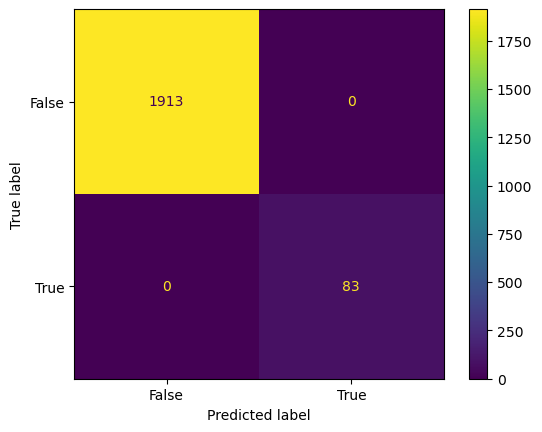

In [22]:
ConfusionMatrixDisplay.from_estimator(model_reg,X_test,y_test);

# Communicate

### 🌟 Identifying the Most Important Features

After training our models, it’s valuable to understand **which features have the greatest influence** on the model’s predictions.  
Feature importance provides insights into how the model makes decisions — helping us interpret results and potentially improve the dataset or business strategy.

---

### 🧮 What is Feature Importance?

For a **Decision Tree**, feature importance is measured using the **Gini Importance** (also known as the *Mean Decrease in Impurity*).  
It quantifies how much each feature contributes to reducing classification uncertainty in the model.  
In simpler terms:
> The higher the Gini Importance, the more useful the feature is in predicting whether a company will go bankrupt.

---

### 📊 Visualization: Top 15 Features

We’ll plot a **horizontal bar chart** showing the **15 most important features** from our best-performing model, `model_over`.  
This visualization makes it easy to compare feature influence and highlight which variables have the strongest predictive power.

- The **x-axis** will represent the **Gini Importance**.  
- The **y-axis** will list the feature names.  
- Longer bars indicate more important features.

---

### 🧠 Why It Matters

Understanding feature importance helps us:
- Gain transparency into **how the model makes decisions**.  
- Identify **key financial or operational indicators** linked to bankruptcy risk.  
- Simplify the model by potentially removing **low-importance features** without losing much predictive power.

This step bridges the gap between **data science and business insight**, showing which factors truly drive company stability or failure.


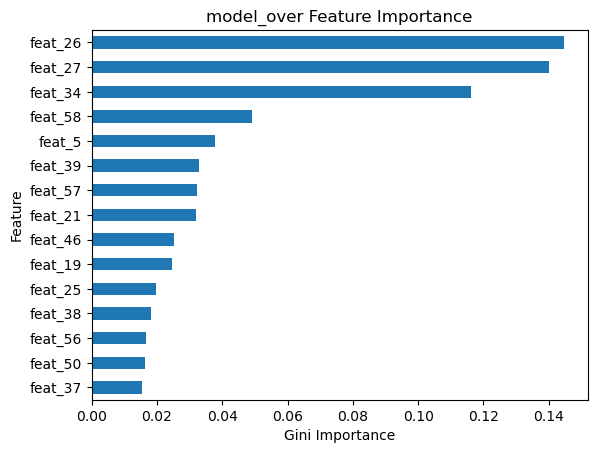

In [23]:
importances = model_over.named_steps["decisiontreeclassifier"].feature_importances_
feat_imp = pd.Series(importances,index=X_train_over.columns).sort_values()
feat_imp.tail(15).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("model_over Feature Importance");

### 💾 Saving the Best Model

Once we’ve identified our **best-performing model**, the final step is to **save it** so that it can be easily reused — without retraining from scratch.  
This is especially useful when deploying a model in production, sharing it with others, or running predictions later.

---

### ⚙️ Why Use a Context Manager?

A **context manager** (using the `with` statement) is a clean and safe way to handle file operations in Python.  
It automatically:
- **Opens** the file,  
- **Writes** or **saves** the model, and  
- **Closes** the file properly, even if an error occurs.

This prevents potential data corruption or resource leaks that can happen with manual file handling.

---

### 🧩 Implementation Summary

We’ll use the **`pickle`** module to serialize and save the trained model object — essentially converting it into a binary format that can be stored on disk.

The process involves:
1. Opening a new file named `"decision-tree.pkl"` in **write-binary mode (`'wb'`)**.  
2. Using `pickle.dump()` to write the model to the file.  
3. Automatically closing the file after saving (thanks to the context manager).


In [24]:
with open("decision-tree.pkl","wb") as f:
    pickle.dump(model_over,f)

## 🎯 Conclusion

In this project, we developed a **bankruptcy prediction model** using financial and operational data.  
Through careful data preparation, exploration, and model evaluation, we built and compared multiple approaches to handle **class imbalance** — a common challenge in real-world classification problems.

---

### 🧠 Key Learnings

- **Data Understanding:** We began by exploring the dataset, identifying numerical features, missing values, and an imbalanced target variable.  
- **Resampling Techniques:** We applied both **under-sampling** and **over-sampling** to balance the dataset and observed their impact on model performance.  
- **Modeling:** Using a **Decision Tree Classifier** with a **SimpleImputer**, we trained three versions of the model and evaluated their results.  
- **Evaluation:** Accuracy, confusion matrices, and feature importance visualizations gave us deeper insights into model behavior and fairness.  
- **Model Saving:** Finally, we saved our best-performing model (`model_over`) for future use and deployment.

---

### 📊 Insights

- Balancing the dataset significantly improved the model’s ability to detect bankrupt companies.  
- The **over-sampled model** provided the most consistent and reliable predictions.  
- Feature importance analysis highlighted key financial indicators driving bankruptcy risk.


### 🏁 Final Thought

This project demonstrates a complete end-to-end **machine learning workflow** — from data wrangling and exploration to modeling, evaluation, and saving results.  
By understanding the data and carefully handling imbalance, we built a model that not only performs well but also provides **meaningful, interpretable insights** into the factors that drive business risk.
